### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии

In [3]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

Теперь посчитаем коэффициенты линейной регрессии с помощью метода нименьших квадратов:
Сначала перезапишем наши данные в матричный вид, к матрице значений salary добавим фиктивный фактор

In [5]:
scoring_M = scoring.reshape(-1, 1)
salary_M = salary.reshape(-1, 1)
ones = np.ones((salary_M.shape))
salary_M = np.hstack((ones, salary_M))

In [6]:
salary_M

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [7]:
XTX = salary_M.T.dot(salary_M)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [8]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary_M.T).dot(scoring_M)

print(b)

[[444.17735732]
 [  2.62053888]]


Таким образом модель линейной регрессии будет иметь вид:
$$y = 444.18 + 2.62 \cdot x,$$

Теперь построим scatter plot для нашей модели:

Text(0,0.5,'Значения поведенческого кредитного скоринга')

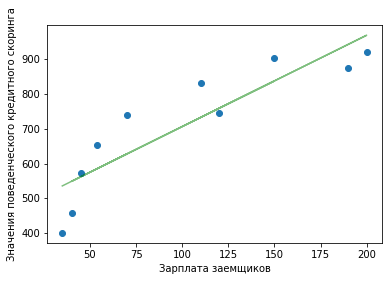

In [9]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel('Зарплата заемщиков')
plt.ylabel('Значения поведенческого кредитного скоринга')

Посчитаем коэффициент детерминаци. Сначала создадим массив предсказанных значений:


In [10]:
scoring_pred = b0 + b1 * salary

print(f'real: {scoring}')
print(f'pred: {scoring_pred}')

real: [401 574 874 919 459 739 653 902 746 832]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [11]:
R = scoring_pred.var() / scoring.var()
R

0.7876386635293678

Теперь посчитаем коэффициент детерминации как квадрат корреляции между массивами:

In [12]:
np.corrcoef(salary, scoring) ** 2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Посчитаем среднюю ошибку аппроксимации

In [13]:
np.abs((scoring - scoring_pred) / scoring).mean()

0.11469251843561709

Приступим к оценке построенного уравнения регрессии с помощью F-критерия Фишера.

Для нашего примера имеем $k_1 = 1$, $k_2 = 10 - 2 = 8$. Посчитаем значение статистики $T$:

In [14]:
k1 = 1
k2 = 8

T1 = (R / (1 - R)) * (k2 / k1)
T1

29.67164085966437

In [15]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

Теперь перейдем к оценке значимости получившихся параметров уравнения регрессии и построению для них доверительных интервалов с помощью t-статистики Стьюдента.

In [16]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [17]:
s_slope = standard_error_slope(salary, scoring, scoring_pred)
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.3060$.

In [18]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Гипотеза заключается в том, что коэффициент $b_1 = 0$. Значение статистики $T$:

In [19]:
T = b1 / s_slope
T

5.447168150485579

Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра  $b_1$  отвергается

Доверительный интервал для параметра $b_1$:

In [20]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

Для параметра $b_0$:

In [21]:
s_intercept = standard_error_slope(salary, scoring, scoring_pred) * np.sqrt((salary ** 2).mean())
s_intercept

56.46649755068153

Значение статистики $T$:

In [22]:
T = b0 / s_intercept
T

7.866210524668863

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

Доверительный интервал для параметра $b_0$:

In [23]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

### Задача 2
Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба

In [24]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [25]:
X1 = anscombe_dataset[['x1']].values
Y1 = anscombe_dataset[['y1']].values

Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии

In [26]:
b1_1 = (np.mean(X1 * Y1) - np.mean(X1) * np.mean(Y1)) / (np.mean(X1 ** 2) - np.mean(X1) ** 2)
b1_1

0.5000909090909076

In [27]:
b0_1 = np.mean(Y1) - b1_1 * np.mean(X1)
b0_1

3.0000909090909245

модель линейной регрессии имеет вид:
$$y = 3 + 0.5 \cdot x,$$


In [28]:
X2 = anscombe_dataset[['x2']].values
Y2 = anscombe_dataset[['y2']].values

In [29]:
b1_2 = (np.mean(X2 * Y2) - np.mean(X2) * np.mean(Y2)) / (np.mean(X2 ** 2) - np.mean(X2) ** 2)
b1_2

0.5000000000000014

In [30]:
b0_2 = np.mean(Y2) - b1_2 * np.mean(X2)
b0_2

3.0009090909090768

In [31]:
X3 = anscombe_dataset[['x3']].values
Y3 = anscombe_dataset[['y3']].values

In [32]:
b1_3 = (np.mean(X3 * Y3) - np.mean(X3) * np.mean(Y3)) / (np.mean(X3 ** 2) - np.mean(X3) ** 2)
b1_3

0.4997272727272716

In [33]:
b0_3 = np.mean(Y3) - b1_3 * np.mean(X3)
b0_3

3.0024545454545555

In [34]:
X4 = anscombe_dataset[['x4']].values
Y4 = anscombe_dataset[['y4']].values

In [35]:
b1_4 = (np.mean(X4 * Y4) - np.mean(X4) * np.mean(Y4)) / (np.mean(X4 ** 2) - np.mean(X4) ** 2)
b1_4

0.49990909090909097

In [36]:
b0_4 = np.mean(Y4) - b1_4 * np.mean(X4)
b0_4

3.0017272727272726

Попробуем построить графики

In [37]:
ox1 = X1
oy1 = b0_1 + b1_1 * ox1

ox2 = X2
oy2 = b0_2 + b1_2 * ox2

ox3 = X3
oy3 = b0_3 + b1_3 * ox3

ox4 = X4
oy4 = b0_4 + b1_4 * ox4

(2, 14)

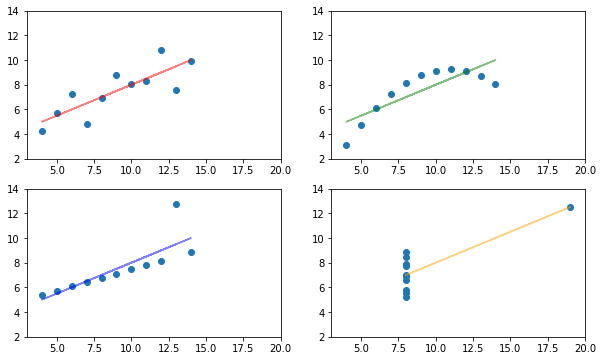

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

ax1.scatter(anscombe_dataset['x1'], anscombe_dataset['y1'])
ax1.plot(ox1, oy1, color='red', alpha=0.5)
ax1.set_xlim(3, 20)
ax1.set_ylim(2, 14)

ax2.scatter(anscombe_dataset['x2'], anscombe_dataset['y2'])
ax2.plot(ox2, oy2, color='green', alpha=0.5)
ax2.set_xlim(3, 20)
ax2.set_ylim(2, 14)

ax3.scatter(anscombe_dataset['x3'], anscombe_dataset['y3'])
ax3.plot(ox3, oy3, color='blue', alpha=0.5)
ax3.set_xlim(3, 20)
ax3.set_ylim(2, 14)

ax4.scatter(anscombe_dataset['x4'], anscombe_dataset['y4'])
ax4.plot(ox4, oy4, color='orange', alpha=0.5)
ax4.set_xlim(3, 20)
ax4.set_ylim(2, 14)